***Small Image Classification Using CNN***

In [18]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.layers import Input,Dense
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [5]:

model = keras.Sequential([
    Input(shape=(32, 32, 3)),
    Dense(3072, activation='relu'),
    Dense(1000, activation='relu')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),#input layer
    layers.Dense(64,activation='relu'),#hidden layer
    layers.Dense(10,activation='softmax') #output layer
]
)


In [11]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [12]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3752 - loss: 1.7043
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5902 - loss: 1.1587
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6491 - loss: 1.0000
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6763 - loss: 0.9276
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6995 - loss: 0.8610
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7233 - loss: 0.8041
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7395 - loss: 0.7552
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7505 - loss: 0.7173
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7650 - loss: 0.6757
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7774 - loss: 0.6378


In [13]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6965 - loss: 0.9029


[0.9048551917076111, 0.6980000138282776]

In [14]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[8.7326514e-03, 2.5394625e-05, 1.4149803e-02, 8.9828861e-01,
        1.5963742e-04, 2.6978917e-02, 6.1101327e-03, 5.7265290e-05,
        4.5448970e-02, 4.8653470e-05],
       [2.7853856e-02, 1.7269967e-01, 4.1310152e-05, 2.6800815e-06,
        1.3760840e-07, 1.0540252e-07, 1.8467166e-07, 8.1533692e-08,
        7.5744349e-01, 4.1958511e-02],
       [3.1230507e-02, 5.5582303e-01, 4.9719814e-04, 1.9474090e-03,
        5.4496975e-04, 3.0769772e-04, 1.5304437e-04, 1.9087431e-03,
        3.8706696e-01, 2.0520335e-02],
       [9.9301845e-01, 8.6583947e-05, 4.1943281e-03, 1.5026110e-04,
        4.8586517e-05, 4.9417599e-06, 2.1364840e-06, 1.8526734e-05,
        2.4658402e-03, 1.0471567e-05],
       [2.1030482e-05, 7.5486350e-05, 2.1628050e-02, 3.1083146e-02,
        3.8880962e-01, 1.8233145e-02, 5.4007280e-01, 7.1036429e-06,
        6.8484704e-05, 1.0823536e-06]], dtype=float32)

In [15]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(1), np.int64(0), np.int64(6)]

In [16]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

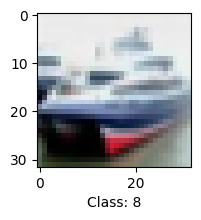

In [27]:

plot_sample(X_test,y_test,1)

In [20]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(f'Class: {y[index]}')
    plt.show()

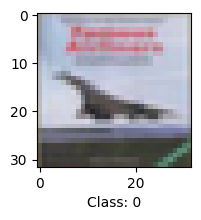

In [21]:
plot_sample(X_test,y_test,3)

In [31]:
classes[y_classes[5]]

'frog'

In [29]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]